Image Classification of Clothing Articles by Adam Astor

The dataset I will work with for this project is called Fashion MNIST. It is preloaded into Tensorflow and separately can be found at the link below:

https://keras.io/api/datasets/

About this Dataset: Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

This project aims to train a machine learning model that is able to accurately classify articles of clothing it has never seen before. The data includes ten classes for different types of clothing commonly seen and worn around the world. Once the project is complete, there are many use cases where this model will be helpful including security, inventory, and disability-related services.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras import optimizers

In [ ]:
#1.  Spit data into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#2. Preprocess data to put it into ANN models
input_dim = 784  # 28*28
output_dim = nb_classes = 10
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

4431872/4422102 [==============================] - 0s 0us/step


First, we will tune the number of layers in our model to see what works best.

Implement a three layer ANN model with 128, 64 and 10 neurons in the layers using 8 as the mini batch size.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

Epoch 1/20
7500/7500 [==============================] - 15s 2ms/step - loss: 0.5641 - accuracy: 0.8042
Epoch 2/20
7500/7500 [==============================] - 14s 2ms/step - loss: 0.4090 - accuracy: 0.8530
Epoch 3/20
 802/7500 [==>...........................] - ETA: 12s - loss: 0.3829 - accuracy: 0.8599

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Implement a four layer ANN model with 128, 64, 32 and 10 neurons in the layers using 8 as the mini batch size.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(32, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Implement a five layer ANN model with 128, 64, 64, 32 and 10 neurons in the layers using 8 as the mini batch size.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(64, activation="relu"))
# our fourth dense layer
model.add(Dense(32, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

While the five-layer models performance improved over the four-layer model, the progress seems to be tapering off. I will continue on to test the activation functions used for the non-output layers. We started with all Relu functions, now I will test Hyperbolic Tangent (tanh).

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(64, activation="tanh"))
# our third dense layer
model.add(Dense(64, activation="tanh"))
# our fourth dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Now I will test the sigmoid activation function.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model.add(Dense(64, activation="sigmoid"))
# our third dense layer
model.add(Dense(64, activation="sigmoid"))
# our fourth dense layer
model.add(Dense(32, activation="sigmoid"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Activation Function Results

Relu:
Test score: 0.3740180432796478
Test accuracy: 0.868399977684021

tanh:
Test score: 0.32836252450942993
Test accuracy: 0.8852999806404114

sigmoid:
Test score: 0.4549947679042816
Test accuracy: 0.8432999849319458

tanh produces the highest test accuracy, so we will use this activation function moving forward.

Next, I will test loss functions by changing from categorical crossentropy to categorical hinge.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(64, activation="tanh"))
# our third dense layer
model.add(Dense(64, activation="tanh"))
# our fourth dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Activation Function Results

Categorical Crossentropy: 
Test score: 0.4549947679042816
Test accuracy: 0.8432999849319458

Categorical Hinge:
Test score: 0.2602691352367401
Test accuracy: 0.8687999844551086

Categorical Hinge produces the highest test accuracy, so we will use this activation function moving forward.

Next, I will test the number of neurons in each non-output layer. Our working model is set to 128, 64, 64, 32. We will change this to double the value at each layer where we will us 256, 128, 128, 64.


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Next, I will test the number of neurons in each non-output layer. Our working model is set to 128, 64, 32, 32. We will change this to half the value at each layer where we will us 64, 32, 16, 16.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# our third dense layer
model.add(Dense(16, activation="tanh"))
# our fourth dense layer
model.add(Dense(16, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=8, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Layer Neuron Count Results

Working model:
Test score: 0.2602691352367401
Test accuracy: 0.8687999844551086

Double: 
Test score: 0.2553660273551941
Test accuracy: 0.8720999956130981

Half: 
Test score: 0.2641873061656952
Test accuracy: 0.8673999905586243

Doubling the number of neurons per layer produces the highest test accuracy, so we will use this number of neurons per layer moving forward.

Next, I will test the batch size. Our working model is set to batch size = 8. We will test the effect of doubling and also halving that value.


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=4, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.9208 - accuracy: 0.5073
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.6893 - accuracy: 0.6769
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5895 - accuracy: 0.7266
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5118 - accuracy: 0.7832
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4474 - accuracy: 0.8070
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4092 - accuracy: 0.8178
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3846 - accuracy: 0.8264
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3675 - accuracy: 0.8317
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3552 - accuracy: 0.8361
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3449 - accuracy: 0.8391

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3230695426464081
Test accuracy: 0.8417999744415283


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Batch Size Results

Working model (8): 
Test score: 0.2553660273551941
Test accuracy: 0.8720999956130981

Double (16): 
Test score: 0.25549373030662537
Test accuracy: 0.8737000226974487

Half (4): 
Test score: 0.25092509388923645
Test accuracy: 0.8741999864578247

128:
Test score: 0.32467037439346313
Test accuracy: 0.8428999781608582

Full sample (X_train.shape[0]):
Test score: 1.0527364015579224
Test accuracy: 0.10670000314712524

The best performance in the training set is achieved using batch size 128 and in the test set using 4 as the mini batch size. However, the difference between the scores of the training and test sets are relatively large for all mini batch sizes. Since the scores achieved when using 128 as the mini batch size are close to those that are achieved when using 4 as the mini batch size, one can go with 128 because of the overfitting concerns. 

Next, I will test the number of epochs. Our working model is set to 20. We will test the effect of doubling and also having that value.


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Number of Epochs Results

Working model (20):
Test score: 0.32467037439346313
Test accuracy: 0.8428999781608582

Double (40): 
Test score: 0.28890904784202576
Test accuracy: 0.8585000038146973

Half (10): 
Test score: 0.3629935383796692
Test accuracy: 0.828000009059906

Doubling the number of epochs produces the highest test accuracy. Although, the increase in compute time is not worth the marginal increase in accuracy when compared tot he working model. We will accept the working model and move forward with 20 epochs

Next, I will test the learning rate. Our working model is set to 1. We will test the effect of 100, 0.01 and 0.0000001 to compare to our working model.



In [ ]:
sgd_001 = optimizers.SGD(lr=0.01)
sgd_100 = optimizers.SGD(lr=100)
sgd_00000001 = optimizers.SGD(lr=0.0000001)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_100, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.7976 - accuracy: 0.0998
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_001, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.9398 - accuracy: 0.4544
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.7150 - accuracy: 0.6832
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.5673 - accuracy: 0.7607
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.5000 - accuracy: 0.7883
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4511 - accuracy: 0.8046
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4144 - accuracy: 0.8157
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3893 - accuracy: 0.8233
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3718 - accuracy: 0.8292
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3584 - accuracy: 0.8352
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3480 - accuracy: 0.8389

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3223553001880646
Test accuracy: 0.8416000008583069


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_00000001, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 1.0652 - accuracy: 0.0836

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.0660972595214844
Test accuracy: 0.08219999819993973


Learning Rate: 100
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Working model (Learning Rate: 0.01)
Test score: 0.3230695426464081
Test accuracy: 0.8417999744415283

Learning Rate: 0.01
Test score: 0.3223553001880646
Test accuracy: 0.8416000008583069

Learning Rate: 0.0000001
Test score: 1.0660972595214844
Test accuracy: 0.08219999819993973

From these results I can see that when the learning rate is set to 100, accuracy is at it's highest at 0.100. However, this is too accurate and will produce overfitting. We will try setting the learning rate to values between 1 and 100 to try to find an accuracy that is near 0.95.

In [ ]:
sgd_25 = optimizers.SGD(lr=25)
sgd_50 = optimizers.SGD(lr=50)
sgd_75 = optimizers.SGD(lr=75)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_25, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7974 - accuracy: 0.1001
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_50, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 1.7975 - accuracy: 0.0999
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
402/469 [========================>.....] - ETA: 0s - loss: 1.8010 - accuracy: 0.0995

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_75, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Learning Rate: 100
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 75
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 50
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 25
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Working model (Learning Rate: 0.01)
Test score: 0.3230695426464081
Test accuracy: 0.8417999744415283

The working model is stil the only valid learning rate amongst these results. We will search again for a higher performing value for learning rate with values at 2, 5, and 7.

In [ ]:
sgd_2 = optimizers.SGD(lr=2)
sgd_5 = optimizers.SGD(lr=5)
sgd_7 = optimizers.SGD(lr=7)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_2, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7943 - accuracy: 0.0997
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_5, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7952 - accuracy: 0.1002
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_7, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7960 - accuracy: 0.1000
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


Learning Rate: 7
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 5
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 2
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Working model (Learning Rate: 0.01)
Test score: 0.3230695426464081
Test accuracy: 0.8417999744415283

The working model is stil the only valid learning rate amongst these results. We will search again for a higher performing value for learning rate with values at 1, 0.5, and 0.1.

In [ ]:
sgd_1 = optimizers.SGD(lr=1)
sgd_05 = optimizers.SGD(lr=0.5)
sgd_01 = optimizers.SGD(lr=0.1)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_1, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7908 - accuracy: 0.1010
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7943 - accuracy: 0.1003
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7946 - accuracy: 0.1022
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999998331069946
Test accuracy: 0.10000000149011612


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_05, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.6563 - accuracy: 0.6490
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3719 - accuracy: 0.8127
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3346 - accuracy: 0.8310
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3148 - accuracy: 0.8418
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2997 - accuracy: 0.8502
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2871 - accuracy: 0.8558
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2822 - accuracy: 0.8584
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2738 - accuracy: 0.8628
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2671 - accuracy: 0.8659
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2618 - accuracy: 0.8685

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2640962302684784
Test accuracy: 0.8672000169754028


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_01, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5323 - accuracy: 0.7457
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3546 - accuracy: 0.8275
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3263 - accuracy: 0.8398
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3095 - accuracy: 0.8475
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2954 - accuracy: 0.8543
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2865 - accuracy: 0.8587
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2793 - accuracy: 0.8622
Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2724 - accuracy: 0.8658
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2638 - accuracy: 0.8694
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2580 - accuracy: 0.8719

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2883323132991791
Test accuracy: 0.8567000031471252


Learning Rate: 1
Test score: 1.7999998331069946
Test accuracy: 0.10000000149011612

Learning Rate: 0.5
Test score: 0.27018558979034424
Test accuracy: 0.864300012588501

Learning Rate: 0.1
Test score: 0.2883323132991791
Test accuracy: 0.8567000031471252

Working model (Learning Rate: 0.01)
Test score: 0.3230695426464081
Test accuracy: 0.8417999744415283

We will accept a learning rate of 0.5 as the most successful value moving forward. Let's continue to test learning rate values between 0.5 and 1 for any further improvement. We will use values 0.6, 0.7, and 0.8.

In [ ]:
sgd_06 = optimizers.SGD(lr=0.6)
sgd_07 = optimizers.SGD(lr=0.7)
sgd_08 = optimizers.SGD(lr=0.8)

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_06, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7151 - accuracy: 0.6143
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3733 - accuracy: 0.8118
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3383 - accuracy: 0.8296
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3171 - accuracy: 0.8404
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3021 - accuracy: 0.8476
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2942 - accuracy: 0.8516
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2836 - accuracy: 0.8575
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2804 - accuracy: 0.8593
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2733 - accuracy: 0.8627
Epoch 10/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2722 - accuracy: 0.8631

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2683403789997101
Test accuracy: 0.8639000058174133


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_07, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7884 - accuracy: 0.1001
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7994 - accuracy: 0.0999
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7675 - accuracy: 0.1076
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7953 - accuracy: 0.1016
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7999 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7995 - accuracy: 0.0998
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 1.4533 - accuracy: 0.2539

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33740130066871643
Test accuracy: 0.8309000134468079


In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_08, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.7949 - accuracy: 0.0997
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8000 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 1.8030 - accuracy: 0.0980
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 1.7933 - accuracy: 0.1004

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612


Learning Rate: 0.8
Test score: 1.7999999523162842
Test accuracy: 0.10000000149011612

Learning Rate: 0.7
Test score: 0.33740130066871643
Test accuracy: 0.8309000134468079

Learning Rate: 0.6
Test score: 0.2683403789997101
Test accuracy: 0.8639000058174133

Working model (Learning Rate: 0.5)
Test score: 0.27018558979034424
Test accuracy: 0.864300012588501

From these results, we can conclude that the optimal learning rate is 0.5.

We now have a machine learning model that has been optimized to classify images of articles of clothing.

We will run our optimized model one more time and save the weights for later use.

In [ ]:
model = Sequential()
# our first dense layer
model.add(Dense(256, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(128, activation="tanh"))
# our third dense layer
model.add(Dense(128, activation="tanh"))
# our fourth dense layer
model.add(Dense(64, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=sgd_05, loss='categorical_hinge',
              metrics=['accuracy'])

# setting verbose=1 prints out some results after each epoch
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.6419 - accuracy: 0.6574
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3675 - accuracy: 0.8149
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3330 - accuracy: 0.8326
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3127 - accuracy: 0.8435
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3040 - accuracy: 0.8475
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2895 - accuracy: 0.8543
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2802 - accuracy: 0.8592
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2759 - accuracy: 0.8613
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2700 - accuracy: 0.8645
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2659 - accuracy: 0.8666

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.27371034026145935
Test accuracy: 0.8616999983787537


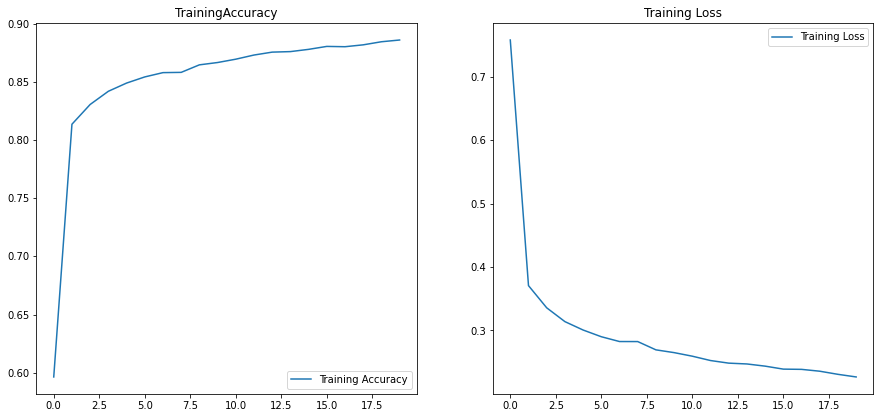

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('TrainingAccuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

Now to evaluate the model we will get the accuracy score, precision, recall, f1-score and confusion matrix.

In [ ]:
#Preparing prediction variables for analysis
y_predict=model.predict(X_test) 
classes_x=np.argmax(y_predict,axis=1)

print(classes_x)

[9 2 1 ... 8 1 5]


A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

It is this breakdown that overcomes the limitation of using classification accuracy alone.

In [ ]:
print(confusion_matrix(y_test, classes_x))

[[870   2  19  11  13   0  73   1  11   0]
 [  3 966   2  17   7   0   3   0   2   0]
 [ 18   3 775   7 160   1  32   0   4   0]
 [ 43  18  17 807  79   0  31   0   5   0]
 [  0   1  82   9 881   0  24   0   3   0]
 [  0   0   0   1   0 951   0  34   2  12]
 [170   3 117  22 143   0 529   0  16   0]
 [  0   0   0   0   0  27   0 966   0   7]
 [  2   0   5   2   7   2   4   5 973   0]
 [  0   0   0   0   0   9   0  78   1 912]]


Accuracy can be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation. The best value of accuracy is 1 and the worst value is 0.



Precision is a value that tells you what proportion of positive predictions are correct. That is, if the model has a precision of 0.75, then 75% of its positive predictions are correct.

The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.

F1-score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score takes both precision and recall into account, which also means it accounts for both FPs and FNs.

In [ ]:
report = classification_report(y_test, classes_x, output_dict=True)

df_classification_report = pd.DataFrame(report).transpose()

df_classification_report['classes'] = df_classification_report.index

df_classification_report

,precision,recall,f1-score,support,classes
0,0.807322,0.8380,0.822375,1000.0000,0
1,0.989648,0.9560,0.972533,1000.0000,1
2,0.833116,0.6390,0.723260,1000.0000,2
3,0.860236,0.8740,0.867063,1000.0000,3
4,0.631872,0.9080,0.745178,1000.0000,4
5,0.975480,0.9150,0.944272,1000.0000,5
6,0.738186,0.5780,0.648345,1000.0000,6
7,0.913662,0.9630,0.937683,1000.0000,7
8,0.960486,0.9480,0.954202,1000.0000,8
9,0.935897,0.9490,0.942403,1000.0000,9


The data labels corrsepond to the following clothing articles:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

---



From the confusion matrix and classification report above, we can see that the model struggled most with classifying Class 6 (Shirt) and performed best at predicting Class 1 (Trouser).



To confirm our results, we will use cross-validation.

So far, I have been using a train-test split to reserve a portion of the data for testing. I do this so that I have some previously unseen data to test the model. If I train and test with the same data, I run the risk of overfitting the model to the training data.

But there is still a risk of overfitting to the test data itself. If I tune my model to perform well on the test data, what guarantee do I have that it will continue to perform as well on new data? Also, I know that the training algorithm is susceptible to small changes in the data.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X_train, y_train):
  # Fit the model
	model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=0)
	# evaluate the model
	scores = model.evaluate(X_test, Y_test, verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 87.24%
accuracy: 86.82%
accuracy: 86.26%
accuracy: 86.27%
accuracy: 86.38%
accuracy: 85.81%
accuracy: 85.57%
accuracy: 84.84%
accuracy: 86.51%
accuracy: 85.68%
86.14% (+/- 0.65%)


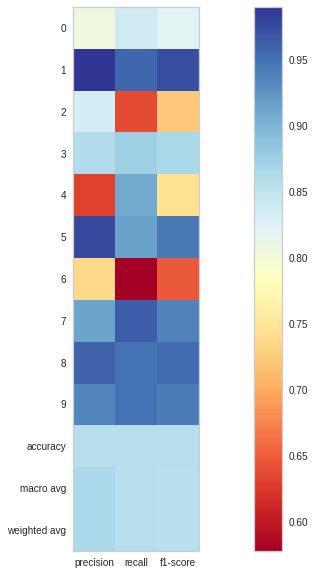

In [ ]:
#df_classification_report.drop('classes', axis=1, inplace=True)

#df_classification_report.drop('support', axis=1, inplace=True)
plt.figure(figsize=(20,10))
plt.imshow(df_classification_report, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df_classification_report.columns)), df_classification_report.columns)
plt.yticks(range(len(df_classification_report.index)), df_classification_report.index)
plt.grid(b=None)
plt.show()

Now that we have a working model that has been tuned and evaluated, we can make some predictions on new images of clothing articles to see if it can accurately classify based on the training it has received so far.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below, we have a sample image that the model has never seen before. Let's test our model to see if it can classify the image correctly. We are looking for a result of 2 representing the class of "Pullover".

Populating the interactive namespace from numpy and matplotlib


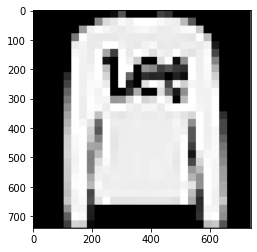

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/python_for_data_scientists/Capstone 4 Final Project/V2/Prediction Sample Image/sample_image.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, input_dim)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
  img = load_image('/content/drive/MyDrive/python_for_data_scientists/Capstone 4 Final Project/V2/Prediction Sample Image/sample_image.png')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	#result = model.predict_classes(img, verbose=1)
  predict_x=model.predict(img)
  result=np.argmax(predict_x,axis=1)
  print(result[0])
 
# entry point, run the example
run_example()

2


Correct! The image was correctly identified as a Pullover.

We can conclude that we have a robust image classification model that can accurately identify images of clothing articles in the Fashion MNIST dataset.

The Fashion MNIST contains images of 10 different classes of types of clothing: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle boot. While the classes do not include every type of clothing imaginable, they do cover a large amount of common clothing types that are seen and worn worldwide. Given the types of clothing the model is trained on, there are many possible use cases for the image classification model.

This model could be used to identify clothes for a blind person to wear through their phone, or for security and asset protection purposes at a department store by the security cameras. This model can help to organize a clothing donation center or to make an online clothing store search function more efficient.

It will run in a production environment by utilizing the code two cells above this cell. Simply replace the filepath with the filepath of the image you wish to classify and run the cell. The predicted class of the image will print, telling you which type of clothing article is shown in the image.

To maintain this project going forward, the user will need to make sure that all modules are updated and their calls are working appropriately. 

We started with a sequential model for image classification. Through testing variables like number of layers, neurons, activation functions, etc, we have settled on a 5-layer Sequential model that has 256, 128, 128, 64 and 10 neurons respectively and uses hyperbolic tangent as it's activation function. The model uses an SGD optimizer with a learning rate of 0.5 and a categorical hinge loss function. The batch size is 128 and is set to 20 epochs for the training.